In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting

In [3]:
# Plotting the population of India from 1960-2022

xdata = np.arange(1960, 2023)
ydata = np.array([445954579, 456352876, 467024193, 477933619, 489059309, 500114346, 510992617, 521987069, 533431909, 545314670, 
                  557501301, 569999178, 582837973, 596107483, 609721951, 623524219, 637451448, 651685628, 666276760, 681248383, 
                  696282385, 712869298, 729169466, 762895156, 780242084, 797878993, 815716125, 833729681, 852012673, 870452165, 
                  888941756, 907574049, 926351297, 945261958, 967279129, 983281218, 1e9, 1.02e9, 1.04e9, 1.06e9, 1.08e9, 1.1e9, 
                  1.12e9, 1.14e9, 1.15e9, 1.17e9, 1.19e9, 1.21e9, 1.22e9, 1.24e9, 1.26e9, 1.27e9, 1.27e9, 1.29e9, 1.31e9, 1.32e9, 
                  1.34e9, 1.35e9, 1.37e9, 1.38e9, 1.4e9, 1.41e9, 1.42e9])

In [4]:
# Exponential function for fitting
def exponential_func(x, a, b, c):
    return a * np.exp(b * (x - 1960)) + c

# Fit the data using curve_fit with initial guess values
initial_guess = [1e8, 0.02, 4e8]  # You may need to adjust these initial guess values
params, covariance = curve_fit(exponential_func, xdata, ydata, p0=initial_guess)

# Generate fitted curve
fit_curve = exponential_func(xdata, *params)

In [5]:
# Extract fitted parameters
a, b, c = params

# Print the values of K and r
print("Fitted value of P:", a)
print("Fitted value of r:", b)
print('Fitted value for vertial offset:', c)

Fitted value of P: 4881202147.744594
Fitted value of r: 0.0031289526298559286
Fitted value for vertial offset: -4470838792.926653


In [6]:
# Verhulst model function for fitting
def verhulst_model(t, K, P0, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * (t - 1960)))

# Fit the data using curve_fit with initial guess values
initial_guess = [1.5e9, 4.5e8, 0.05]  # You may need to adjust these initial guess values
params, covariance = curve_fit(verhulst_model, xdata, ydata, p0=initial_guess)

# Generate fitted curve
log_fit = verhulst_model(xdata, *params)

In [7]:
# Extract fitted parameters
K_fit, P0_fit, r_fit = params

# Print the values of K and r
print("Fitted value of K:", K_fit)
print("Fitted value of r:", r_fit)
print(P0_fit)


Fitted value of K: 1965740258.4434202
Fitted value of r: 0.036790185573753444
423807767.5067892


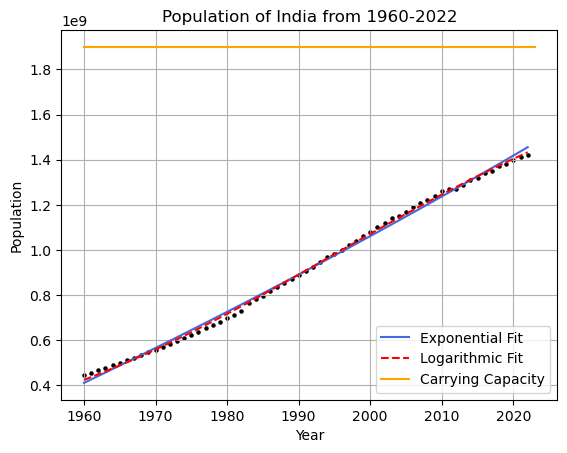

In [8]:
plt.scatter(xdata, ydata, color = 'black', s = 5)
plt.plot(xdata, fit_curve, color='royalblue', label = 'Exponential Fit')
plt.plot(xdata, log_fit, color='red', label = 'Logarithmic Fit', linestyle = '--')
plt.plot(np.array([1960, 2023]), np.array([1.9e9, 1.9e9]), color = 'orange', label = 'Carrying Capacity')
plt.grid()
plt.title('Population of India from 1960-2022')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

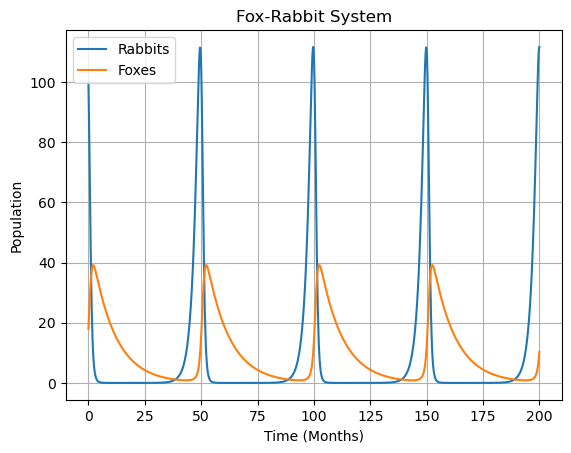

In [9]:
# Predator-Prey Model with rabbits and foxes

from scipy.integrate import odeint

# Define the Lotka-Volterra equations
def predator_prey_system(y, t, alpha, beta, gamma, delta):
    x, z = y
    dxdt = alpha * x - beta * x * z
    dzdt = delta * x * z - gamma * z
    return [dxdt, dzdt]

# Initial populations
x0 = 100  # Initial prey population
z0 = 18   # Initial predator population

# Time points
t = np.linspace(0, 200, 1000)

# Parameters
alpha = 0.5  # Prey birth rate
beta = 0.05  # Rate at which predators eat prey
gamma = 0.1  # Predator death rate
delta = 0.01  # Rate at which predators reproduce by eating prey


# Solve the differential equations
solution = odeint(predator_prey_system, [x0, z0], t, args=(alpha, beta, gamma, delta))

# Extract populations from the solution
prey_population = solution[:, 0]
predator_population = solution[:, 1]

# Plot the results
plt.plot(t, prey_population, label='Rabbits')
plt.plot(t, predator_population, label='Foxes')
plt.xlabel('Time (Months)')
plt.ylabel('Population')
plt.legend()
plt.title('Fox-Rabbit System')
plt.grid()
plt.show()


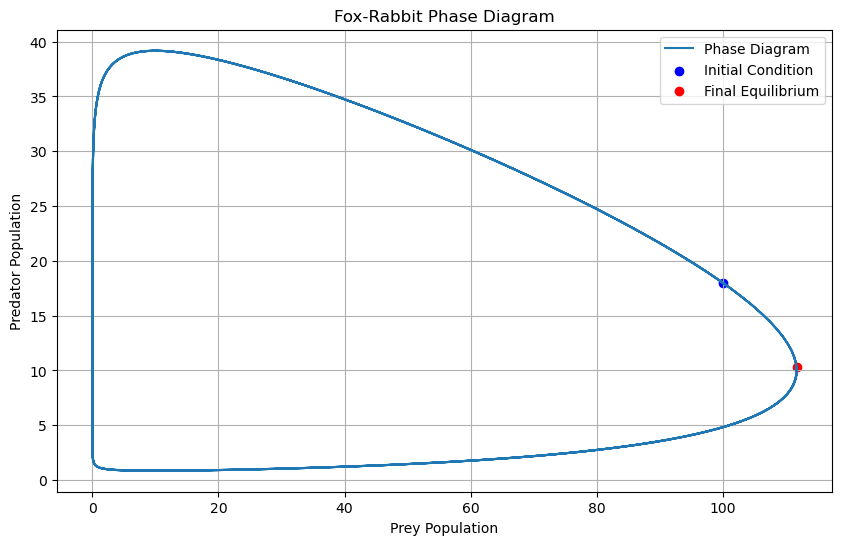

Final Equilibrium Population of Rabbits: 111.69240543519086
Final Equilibrium Population of Foxes: 10.313335705456273


In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
# alpha = 0.1  # Prey birth rate
# beta = 0.02  # Rate at which predators eat prey
# delta = 0.01  # Rate at which predators increase by eating prey
# gamma = 0.1  # Predator death rate

# Function representing the system of equations
def predator_prey_system(t, y):
    prey, predator = y
    dydt = [alpha * prey - beta * prey * predator, delta * prey * predator - gamma * predator]
    return dydt

# Solve the differential equations using solve_ivp
solution = solve_ivp(
    fun=predator_prey_system,
    t_span=(0, 200),
    y0=[x0, z0],
    dense_output=True,
    max_step=0.1
)

# Extract prey and predator populations from the solution
prey_population = solution.y[0]
predator_population = solution.y[1]

# Plot the phase diagram
plt.figure(figsize=(10, 6))
plt.plot(prey_population, predator_population, label='Phase Diagram')

# Plot nullclines
# prey_values = np.linspace(0, 50, 100)
# plt.plot(prey_values, alpha / beta * np.ones_like(prey_values), linestyle='--', label='Prey Nullcline')
# plt.plot(prey_values, gamma / (delta * prey_values), linestyle='--', label='Predator Nullcline')

# Mark the initial condition
plt.scatter(prey_population[0], predator_population[0], color='blue', label='Initial Condition')

# Mark the final equilibrium point
final_equilibrium = (prey_population[-1], predator_population[-1])
plt.scatter(final_equilibrium[0], final_equilibrium[1], color='red', label='Final Equilibrium')

plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Fox-Rabbit Phase Diagram')
plt.legend()
plt.grid()
plt.show()
print('Final Equilibrium Population of Rabbits:', prey_population[-1])
print('Final Equilibrium Population of Foxes:', predator_population[-1])


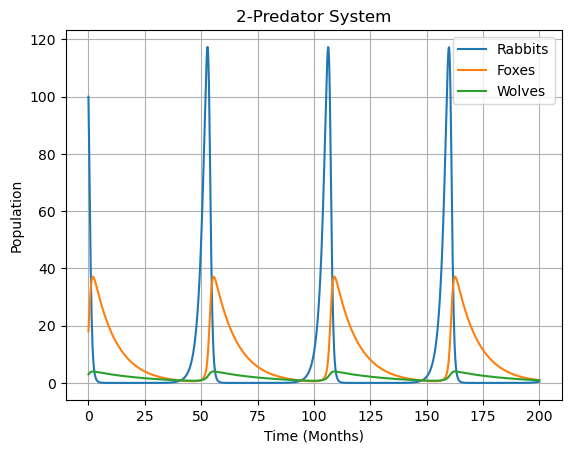

In [11]:
# Adding Wolves
# Predator-Prey Model with rabbits and foxes

from scipy.integrate import odeint

# Define the Lotka-Volterra equations
def predator_prey_system(y, t, alpha, beta, gamma, delta, epsilon, kappa, iota):
    x, z, w = y
    dxdt = alpha * x - beta * x * z - epsilon * x * w
    dzdt = delta * x * z - gamma * z
    dwdt = iota * x * w - kappa * w
    return [dxdt, dzdt, dwdt]

# Initial populations
x0 = 100  # Initial prey population
z0 = 18   # Initial predator population
w0 = 3 # Initial wolf population

# Time points
t = np.linspace(0, 200, 1000)

# Parameters
alpha = 0.5  # Prey birth rate
beta = 0.05  # Rate at which predators eat prey
gamma = 0.1  # Predator death rate
delta = 0.01  # Rate at which predators reproduce by eating prey
epsilon = 0.03 # Rate at which wolves eat prey
kappa = 0.04 # Wolf death rate
iota = 0.004 # Rate at which wolves reproduce by eating prey


# Solve the differential equations
solution = odeint(predator_prey_system, [x0, z0, w0], t, args=(alpha, beta, gamma, delta, epsilon, kappa, iota))

# Extract populations from the solution
prey_population = solution[:, 0]
fox_population = solution[:, 1]
wolf_population = solution[:, 2]

# Plot the results
plt.plot(t, prey_population, label='Rabbits')
plt.plot(t, fox_population, label='Foxes')
plt.plot(t, wolf_population, label = 'Wolves')
plt.xlabel('Time (Months)')
plt.ylabel('Population')
plt.legend()
plt.title('2-Predator System')
plt.grid()
plt.show()


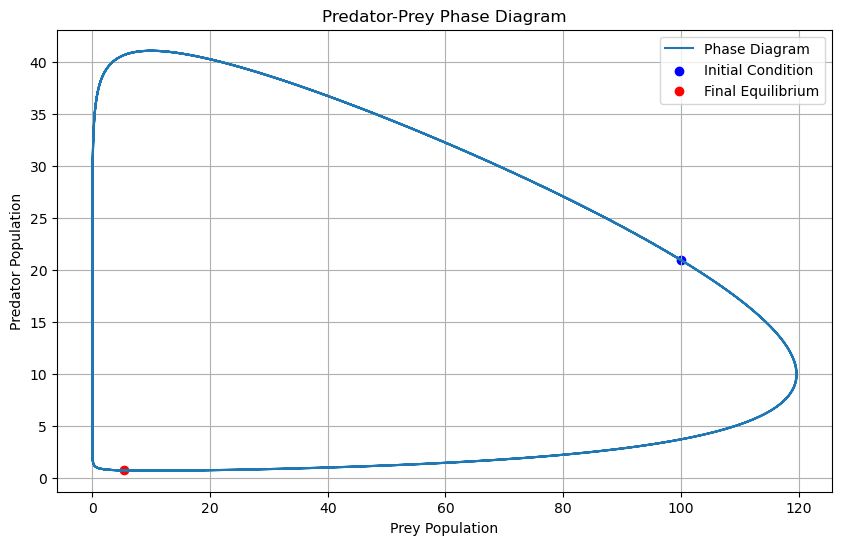

Final Equilibrium Population of Rabbits: 5.430392633528882
Final Equilibrium Population of Foxes and Wolves: 0.7487396805598551


In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
# alpha = 0.1  # Prey birth rate
# beta = 0.02  # Rate at which predators eat prey
# delta = 0.01  # Rate at which predators increase by eating prey
# gamma = 0.1  # Predator death rate

# Function representing the system of equations
def predator_prey_system(t, y):
    prey, predator = y
    dydt = [alpha * prey - beta * prey * predator, delta * prey * predator - gamma * predator]
    return dydt

# Solve the differential equations using solve_ivp
solution = solve_ivp(
    fun=predator_prey_system,
    t_span=(0, 200),
    y0=[x0, z0 + w0],
    dense_output=True,
    max_step=0.1
)

# Extract prey and predator populations from the solution
prey_population = solution.y[0]
predator_population = solution.y[1]

# Plot the phase diagram
plt.figure(figsize=(10, 6))
plt.plot(prey_population, predator_population, label='Phase Diagram')

# Plot nullclines
# prey_values = np.linspace(0, 50, 100)
# plt.plot(prey_values, alpha / beta * np.ones_like(prey_values), linestyle='--', label='Prey Nullcline')
# plt.plot(prey_values, gamma / (delta * prey_values), linestyle='--', label='Predator Nullcline')

# Mark the initial condition
plt.scatter(prey_population[0], predator_population[0], color='blue', label='Initial Condition')

# Mark the final equilibrium point
final_equilibrium = (prey_population[-1], predator_population[-1])
plt.scatter(final_equilibrium[0], final_equilibrium[1], color='red', label='Final Equilibrium')

plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Predator-Prey Phase Diagram')
plt.legend()
plt.grid()
plt.show()
print('Final Equilibrium Population of Rabbits:', prey_population[-1])
print('Final Equilibrium Population of Foxes and Wolves:', predator_population[-1])


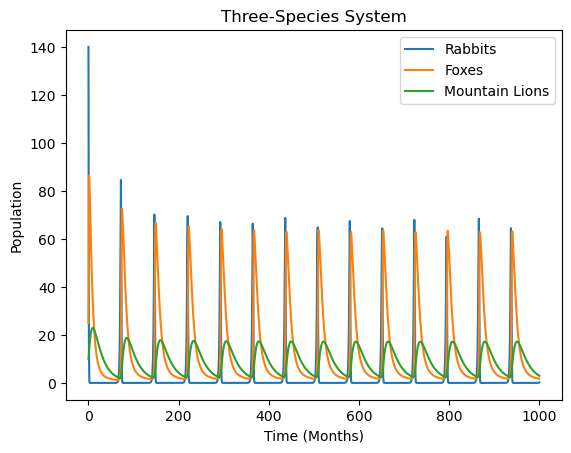

In [14]:
# Predator-Prey Model with rabbits, foxes, and mountain lions

# Define the Lotka-Volterra equations
def predator_prey_system2(y, t, alpha, beta, gamma, delta, sigma, epsilon, kappa, iota, eta):
    x, z, c = y
    dxdt = alpha * x - beta * x * z - sigma * x * c
    dzdt = delta * x * z - eta * z * c # gamma * z -
    dcdt = epsilon * x + iota * z - kappa * c
    return [dxdt, dzdt, dcdt]

# Initial populations
x0 = 140  # Initial prey population
z0 = 25   # Initial predator population
c0 = 10 # Initial super predator population
initial_conditions = [x0, z0, c0]

# Time points
t = np.linspace(0, 1000, 1000)

# Parameters
alpha = 0.9  # Rabbit birth rate
beta = 0.045  # Rate at which foxes eat rabbits
sigma = 0.035 # Rate at which mls eat rabbits
# gamma = 0.1  # Fox death rate
delta = 0.018 # Rate at which foxes reproduce by eating rabbits
epsilon = 0.003 # Rate at which mls reproduce by eating rabbits
eta = 0.006 # Rate at which mls eat foxes
iota = 0.04 # Rate at which mls reproduce by eating foxes
kappa = 0.06 # ml death rate


# Solve the differential equations
solution = odeint(predator_prey_system2, [x0, z0, c0], t, args=(alpha, beta, gamma, delta, sigma, epsilon, kappa, iota, eta))

# Extract populations from the solution
prey_population = solution[:, 0]
predator_population = solution[:, 1]
superpredator_population = solution[:, 2]

# Plot the results
plt.plot(t, prey_population, label='Rabbits')
plt.plot(t, predator_population, label='Foxes')
plt.plot(t, superpredator_population, label = 'Mountain Lions')
plt.xlabel('Time (Months)')
plt.ylabel('Population')
plt.legend()
plt.title('Three-Species System')
plt.show()

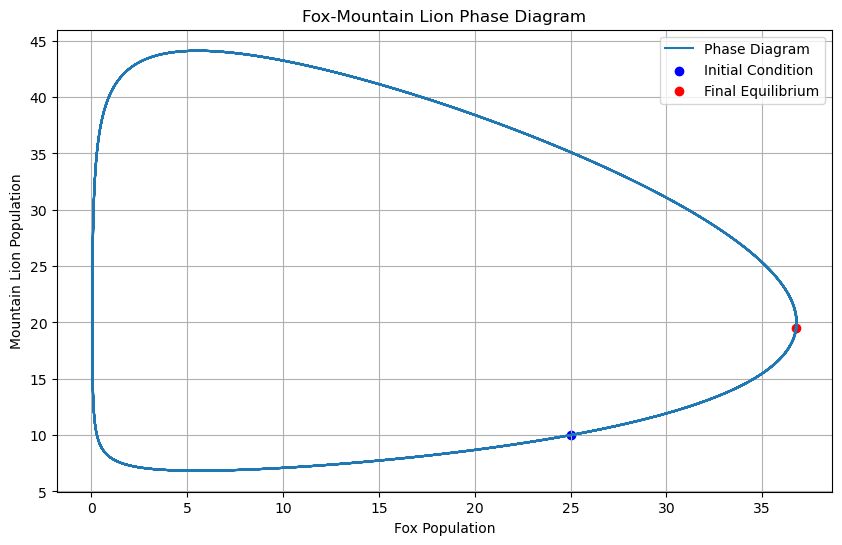

Final Equilibrium Population of Foxes: 36.78759901251139
Final Equilibrium Population of Mountain Lions: 19.501607785733032


In [195]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
# alpha = 0.1  # Prey birth rate
# beta = 0.02  # Rate at which predators eat prey
# delta = 0.01  # Rate at which predators increase by eating prey
# gamma = 0.1  # Predator death rate

# Function representing the system of equations
def predator_prey_system(t, y):
    prey, predator = y
    dydt = [alpha * prey - beta * prey * predator, delta * prey * predator - gamma * predator]
    return dydt

# Solve the differential equations using solve_ivp
solution = solve_ivp(
    fun=predator_prey_system,
    t_span=(0, 200),
    y0=[z0, c0],
    dense_output=True,
    max_step=0.1
)

# Extract prey and predator populations from the solution
prey_population = solution.y[0]
predator_population = solution.y[1]

# Plot the phase diagram
plt.figure(figsize=(10, 6))
plt.plot(prey_population, predator_population, label='Phase Diagram')

# Plot nullclines
# prey_values = np.linspace(0, 50, 100)
# plt.plot(prey_values, alpha / beta * np.ones_like(prey_values), linestyle='--', label='Prey Nullcline')
# plt.plot(prey_values, gamma / (delta * prey_values), linestyle='--', label='Predator Nullcline')

# Mark the initial condition
plt.scatter(prey_population[0], predator_population[0], color='blue', label='Initial Condition')

# Mark the final equilibrium point
final_equilibrium = (prey_population[-1], predator_population[-1])
plt.scatter(final_equilibrium[0], final_equilibrium[1], color='red', label='Final Equilibrium')

plt.xlabel('Fox Population')
plt.ylabel('Mountain Lion Population')
plt.title('Fox-Mountain Lion Phase Diagram')
plt.legend()
plt.grid()
plt.show()
print('Final Equilibrium Population of Foxes:', prey_population[-1])
print('Final Equilibrium Population of Mountain Lions:', predator_population[-1])


In [ ]:
# The Epidemic Equation

def epidemic(y, t, alpha, beta):
    H, S, I, N = y
    dhdt = -alpha * H * S
    dsdt = alpha * H * S - beta * S
    didt = beta * S
    dNdt = 0

Day with the most infected individuals: Day 63
Number of infected individuals at peak: 534887.71
The total number of sick people: 19818792.162677832
Duration of epidemic: 21 day(s)


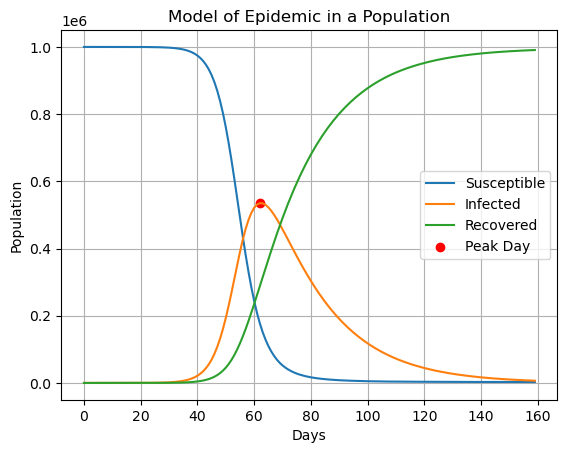

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# SIR model differential equations with constant total population
def sir_model(t, y, alpha, beta, total_population):
    S, I, R = y
    dSdt = -alpha * S * I / total_population
    dIdt = (alpha * S * I / total_population) - beta * I
    dRdt = beta * I
    return [dSdt, dIdt, dRdt]

# Parameters
total_population = 1e6
initial_infected = 1
transmission_rate = 0.3
recovery_rate = 0.05

# Initial conditions
initial_conditions = [total_population - initial_infected, initial_infected, 0]

# Time parameters
days = 160
time_span = (0, days)

# Solve the system of ODEs using solve_ivp
solution = solve_ivp(
    fun=lambda t, y: sir_model(t, y, transmission_rate, recovery_rate, total_population),
    t_span=time_span,
    y0=initial_conditions,
    t_eval=np.arange(0, days, 1)
)

# Plotting the results
time = solution.t
susceptible, infected, recovered = solution.y

# Find the day with the maximum number of infected individuals
peak_day = np.argmax(infected)
peak_infected = infected[peak_day]

# Finding the duration of the epidemic
threshold = 0.00015 * total_population
epidemic_length = np.argmax(infected > threshold)

print(f"Day with the most infected individuals: Day {peak_day + 1}")
print(f"Number of infected individuals at peak: {peak_infected:.2f}")
print('The total number of sick people:', np.sum(infected))
print('Duration of epidemic:', epidemic_length, 'day(s)')

plt.plot(time, susceptible, label='Susceptible')
plt.plot(time, infected, label='Infected')
plt.plot(time, recovered, label='Recovered')
plt.scatter(time[peak_day], peak_infected, color='red', marker='o', label='Peak Day')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Model of Epidemic in a Population')
plt.legend()
plt.grid()
plt.show()


In [77]:
print(susceptible[peak_day] + infected[peak_day] + recovered[peak_day])

1000000.0


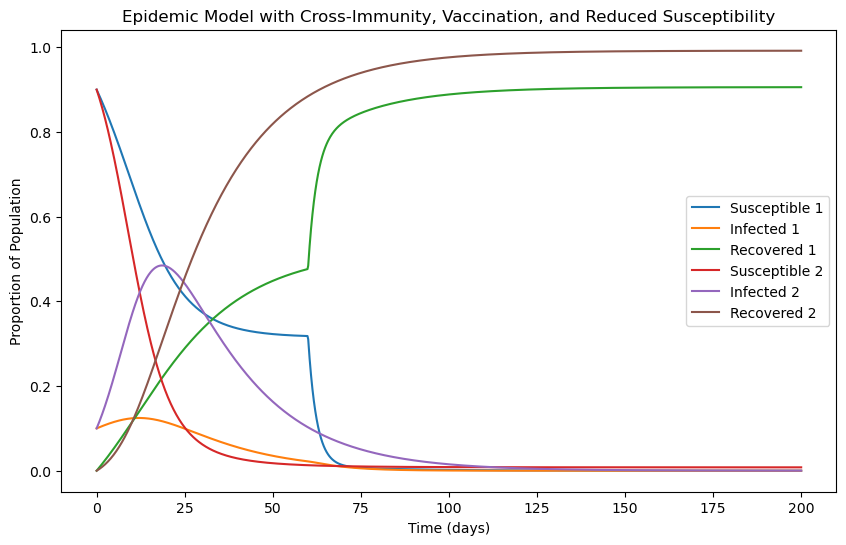

In [228]:
def deriv(y, t, beta1, beta2, gamma1, gamma2, epsilon, vaccination_rate, vaccination_start, vaccine_effectiveness):
    S1, I1, R1, S2, I2, R2 = y

    # Constant population factor
    N = S1 + I1 + R1 + S2 + I2 + R2

    # Vaccination term for the first virus
    if t >= vaccination_start:
        vaccination_effect = vaccination_rate * S1
    else:
        vaccination_effect = 0

    # Reduced susceptibility for those vaccinated to the second virus
    reduced_susceptibility = vaccine_effectiveness * (S1 + R1)

    # SIR model equations with cross-immunity, vaccination, and constant population
    dS1dt = -beta1 * S1 * I1 / N - epsilon * beta2 * (S1 - reduced_susceptibility) * I2 / N - vaccination_effect
    dI1dt = beta1 * S1 * I1 / N - gamma1 * I1
    dR1dt = gamma1 * I1 + vaccination_effect

    dS2dt = -epsilon * beta1 * S2 * I1 / N - beta2 * S2 * I2 / N
    dI2dt = epsilon * beta1 * S2 * I1 / N + beta2 * S2 * I2 / N - gamma2 * I2
    dR2dt = gamma2 * I2

    return [dS1dt, dI1dt, dR1dt, dS2dt, dI2dt, dR2dt]

# Initial conditions: 90% susceptible, 10% infected, 0% recovered
initial_conditions = [0.9, 0.1, 0.0, 0.9, 0.1, 0.0]

# Time grid (in days)
t = np.linspace(0, 200, 1000)

# Parameters (adjust as needed)
beta1 = 0.3  # infection rate for virus 1
gamma1 = 0.1  # recovery rate for virus 1
beta2 = 0.4  # infection rate for virus 2
gamma2 = 0.05  # recovery rate for virus 2
epsilon = 0.5  # cross-immunity parameter (adjust as needed)
vaccination_rate = 0.4  # rate of vaccination for virus 1
vaccination_start = 60  # start time for vaccination
vaccine_effectiveness = 0.5  # effectiveness of the vaccine against the second virus

# Integrate the SIR equations over the time grid, using odeint
solution = odeint(deriv, initial_conditions, t, args=(beta1, beta2, gamma1, gamma2, epsilon, vaccination_rate, vaccination_start, vaccine_effectiveness))

# Extracting the results for each compartment
S1, I1, R1, S2, I2, R2 = solution.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S1, label='Susceptible 1')
plt.plot(t, I1, label='Infected 1')
plt.plot(t, R1, label='Recovered 1')
plt.plot(t, S2, label='Susceptible 2')
plt.plot(t, I2, label='Infected 2')
plt.plot(t, R2, label='Recovered 2')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('Epidemic Model with Cross-Immunity, Vaccination, and Reduced Susceptibility')
plt.legend()
plt.show()
